## Read Smoke Sprite

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from smokesim.vis import show_image, subplot_images

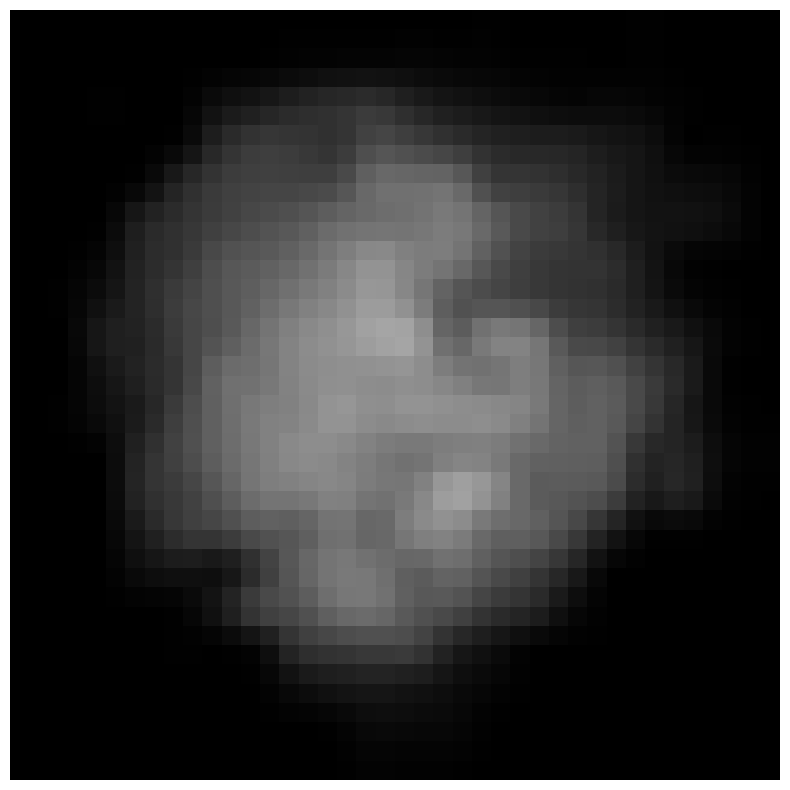

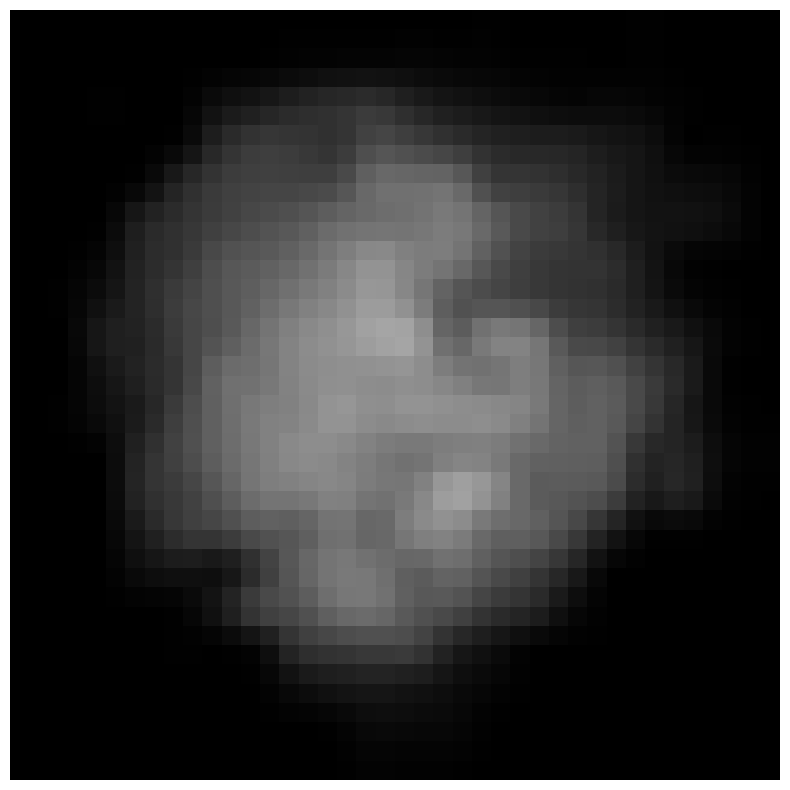

In [17]:
opacities = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 7, 4, 4, 1, 1, 0, 1, 0, 
             0, 0, 0, 0, 1, 0, 0, 17, 27, 41, 52, 56, 34, 23, 15, 11, 4, 9, 5, 1, 0, 0, 0, 0, 0, 0, 1, 45, 63, 57, 45, 78, 66, 
             52, 41, 34, 37, 23, 20, 0, 1, 0, 0, 0, 0, 1, 43, 62, 66, 64, 67, 115, 112, 114, 56, 58, 47, 33, 18, 12, 10, 0, 0, 
             0, 0, 39, 50, 63, 76, 87, 107, 105, 112, 128, 104, 69, 64, 29, 18, 21, 15, 0, 0, 0, 7, 42, 52, 85, 91, 103, 126, 
             153, 128, 124, 82, 57, 52, 52, 24, 1, 0, 0, 0, 2, 17, 41, 67, 84, 100, 122, 136, 159, 127, 78, 69, 60, 50, 47, 25, 
             7, 1, 0, 0, 0, 34, 33, 66, 82, 113, 138, 149, 168, 175, 82, 142, 133, 70, 62, 41, 25, 6, 0, 0, 0, 18, 39, 55, 113, 
             111, 137, 141, 139, 141, 128, 102, 130, 90, 96, 65, 37, 0, 0, 0, 2, 15, 27, 71, 104, 129, 129, 158, 140, 154, 146, 
             150, 131, 92, 100, 67, 26, 3, 0, 0, 0, 0, 46, 73, 104, 124, 145, 135, 122, 107, 120, 122, 101, 98, 96, 35, 38, 7, 2, 
             0, 0, 0, 50, 58, 91, 124, 127, 139, 118, 121, 177, 156, 88, 90, 88, 28, 43, 3, 0, 0, 0, 0, 30, 62, 68, 91, 83, 117, 
             89, 139, 139, 99, 105, 77, 32, 1, 1, 0, 0, 0, 0, 0, 16, 21, 8, 45, 101, 125, 118, 87, 110, 86, 64, 39, 0, 0, 0, 0, 0, 
             0, 0, 0, 0, 1, 28, 79, 79, 117, 122, 88, 84, 54, 46, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 55, 61, 68, 71, 30, 16, 0, 
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 23, 25, 20, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 12, 9, 8, 
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
opacities = np.array(opacities).reshape(20, 20).astype(np.uint8)
show_image(cv2.resize(opacities, (40, 40)))

## Can I use PIL instead of PyGame and expect similar result in faster time?

(40, 40, 4) (500, 700, 4)


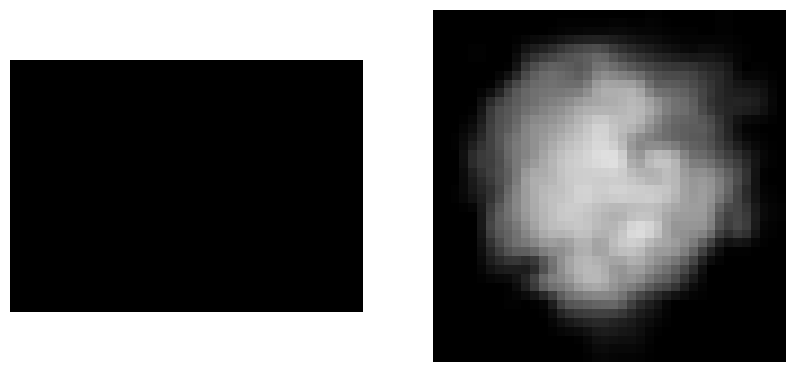

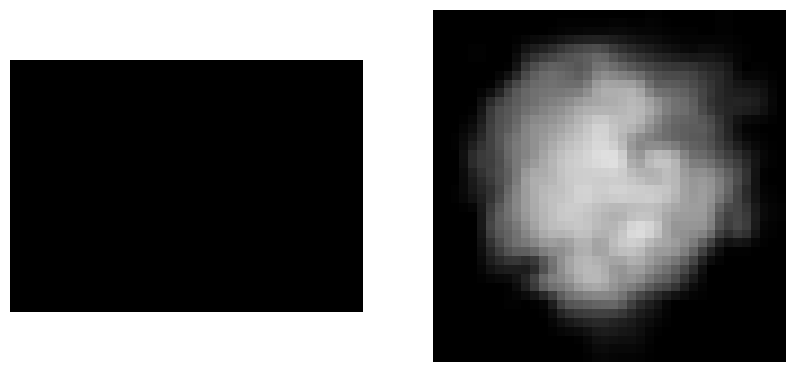

In [23]:
# define a canvas first wiht alpha value
canvas = np.zeros((500, 700, 4), dtype=np.uint8)
canvas[:,:,3]=255
particle_arr = opacities.astype(np.uint8)
particle_arr = cv2.cvtColor(particle_arr, cv2.COLOR_GRAY2RGBA)
particle_arr[:,:,3] = 255-opacities
particle_arr = cv2.resize(particle_arr, (40, 40))
print(particle_arr.shape, canvas.shape)
subplot_images([canvas, particle_arr], order=(1, 2))

In [51]:
from smokesim.augmentation import Augmentation

WIDTH, HEIGHT = 700, 500

augmentation = Augmentation(
    image_path=None, screen_dim=(WIDTH, HEIGHT), random_seed=42
)

augmentation.add_smoke(
    dict(
        particle_count=10,
        sprite_size=25,
        origin=(500, 500),
        particle_args=dict(max_vx=1, min_vx=-1, lifetime=3000),
    )
)
augmentation.add_smoke(
    dict(
        particle_count=10,
        sprite_size=25,
        origin=(500, 600),
        particle_args=dict(max_vx=1, min_vx=-1, lifetime=3000),
    )
)
res = augmentation.augment(500, time_step=10)

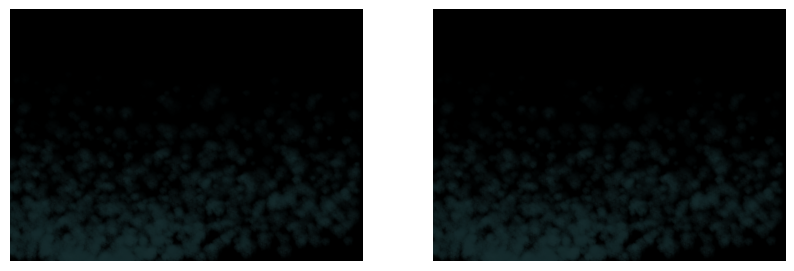

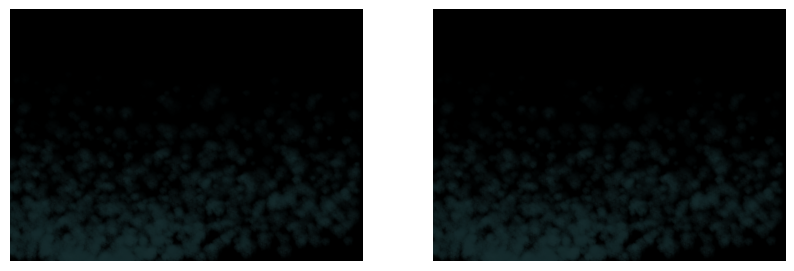

In [52]:
subplot_images(res, order=(1,2))

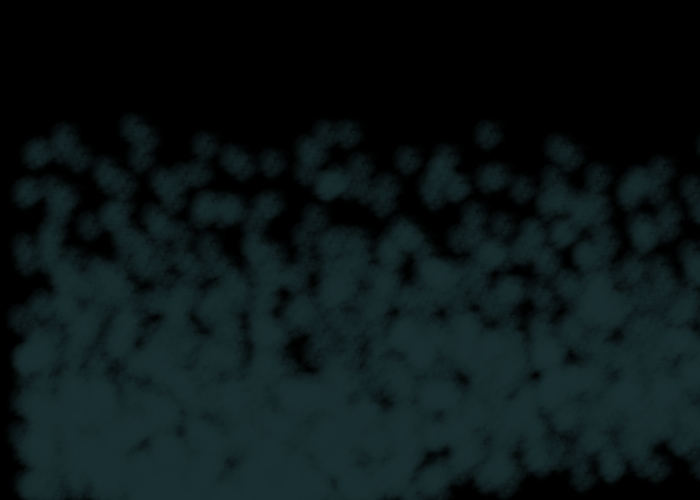

In [ ]:
from PIL import Image

canvas_layer = Image.fromarray(canvas)
canvas_shape = canvas.shape


for smoke in augmentation.smoke_machine.smokes:
    for particle in smoke.particles:
        if not particle.is_alive:
            continue

        curr_particle_arr = particle_arr.copy()
        curr_particle_arr[:,:,:3] = particle.color
        # curr_particle_arr[:,:,3] =
        curr_particle_arr[:, :, 3] = 255 - curr_particle_arr[:, :, 3] 

        particle_layer = Image.fromarray(curr_particle_arr)
        particle_layer.resize(
            (particle.sprite.width, particle.sprite.height)
        )

        canvas_layer.alpha_composite(
            particle_layer,
            tuple(
                map(int, (canvas_shape[1] - particle.x,  particle.y))
            ),
        )

canvas_layer